# Interpolaciija funkcija

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku $x_i, i=0,\ldots, n$ u intervalu $[a,b]$ tako da je $x_i\neq x_j$
i kroz točke $(x_i,f(x_i)$ provucimo interpolacijski polinom.

Za svaku točku $x\in[a,b]$ vrijedi __ocjena pogreške__ (uz pretpostavku da funkcija $f$ ima $n-1$ derivaciju)

$$
f(x)-p_n(x)=\frac{\omega(x)}{(n+1)!} f^{(n+1)}(\xi) \\
\omega(x)=\prod_{k=0}^n (x-x_k)=(x-x_0)(x-x_1)\cdots (x-x_n) \\
\xi \in (\min x_i,\max x_i)
$$



## Primjer

Promotrimo funkciju 

$$
f(x)=\sin(x), \quad x\in[0,\pi].
$$

In [2]:
using Polynomials
using SpecialMatrices
using Winston

In [33]:
n=5
a=0
b=pi
x=collect(linspace(a,b,n))
y=sin(x)

5-element Array{Float64,1}:
 0.0        
 0.707107   
 1.0        
 0.707107   
 1.22465e-16

In [34]:
A=Vandermonde(x)

5x5 SpecialMatrices.Vandermonde{Float64}:
 1.0  0.0       0.0       0.0        0.0     
 1.0  0.785398  0.61685   0.484473   0.380504
 1.0  1.5708    2.4674    3.87578    6.08807 
 1.0  2.35619   5.55165  13.0808    30.8208  
 1.0  3.14159   9.8696   31.0063    97.4091  

In [35]:
c=full(A)\y

5-element Array{Float64,1}:
  0.0      
  0.981968 
  0.0582877
 -0.236096 
  0.0375758

In [36]:
p=Poly(c)

Poly(0.9819683852990765x + 0.058287713474255674x^2 - 0.23609550907952273x^3 + 0.0375757673118035x^4)

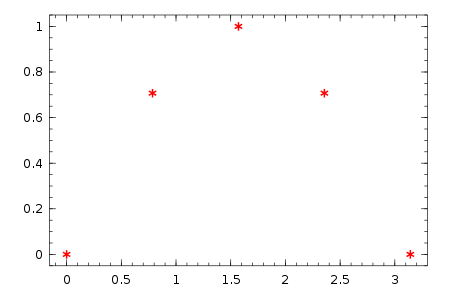

In [37]:
plot(x,y,"r*")

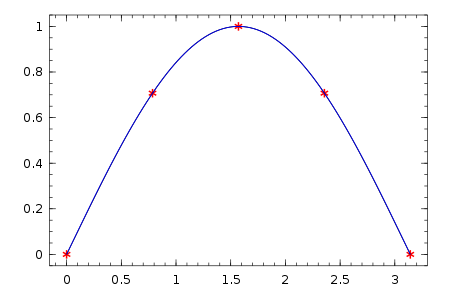

In [39]:
xx=linspace(a,b,100)
pp=polyval(p,xx)
sinus=sin(xx)
plot(x,y,"r*",xx,pp,xx,sinus,"b")

In [40]:
norm(abs(pp-sinus),Inf)

0.0018097268033322178

In [ ]:
ω(t)=prod((t-x[0])